# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members:
- Christopher Lin
- Aman Sharma
- Leo Fan

• Student Numbers of all Group member: 
- 49213176
- 36786853
- 29508539

• Group number (from Canvas): 13


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns', None)


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [3]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0') # (3134, 23)
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv',index_col=0)
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0') # (3193, 3)

In [4]:
fulldf.head(1)

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Med_Income_Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,*


In [5]:
data_dict

,Feature,Definition,Notes
0,State,NaN,NaN
1,AreaName,NaN,NaN
2,All_Poverty,Both male and female reported below poverty li...,NaN
3,M_Poverty,Males below poverty (Raw),NaN
4,F_Poverty,Females below poverty (Raw),NaN
5,FIPS,State + County FIPS (Raw),NaN
6,Med_Income,Med_Income all enthnicities (Raw),NaN
7,Med_Income_White,Med_Income white (Raw),NaN
8,Med_Income_Black,Med_Income black (Raw),NaN
9,Med_Income_Nat_Am,Med_Income native American (Raw),NaN


Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.



### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [6]:
fulldf['FIPS'].head(1)

0    2013
Name: FIPS, dtype: int64

In [7]:
fulldf['FIPS'] = fulldf['FIPS'].astype('str').str.pad(width = 5, fillchar= '0' )

In [8]:
fulldf['FIPS'].head(1)

0    02013
Name: FIPS, dtype: object

### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

Because the percentage of missing values exceeds 20%, we remove the following columns -- Med_Income_Black, Med_Income_Nat_Am, Med_Income_Asian, and Med_Income_Hispanic, whose missing value proportions are 38.6%, 52.97%, 56.1%, and 21.7% respectively.

In [9]:
fulldf.isna().sum()

State                     0
AreaName                  0
All_Poverty               0
M_Poverty                 0
F_Poverty                 0
FIPS                      0
Med_Income                1
Med_Income_White          2
Med_Income_Black       1210
Med_Income_Nat_Am      1660
Med_Income_Asian       1757
Med_Income_Hispanic     681
M_With                    0
M_Without                 0
F_With                    0
F_Without                 0
All_With                  0
All_Without               0
Incidence_Rate            0
Avg_Ann_Incidence         0
Recent_Trend              0
Mortality_Rate            0
Avg_Ann_Deaths            0
dtype: int64

In [10]:
fulldf.isna().sum()/fulldf.__len__()

State                  0.000000
AreaName               0.000000
All_Poverty            0.000000
M_Poverty              0.000000
F_Poverty              0.000000
FIPS                   0.000000
Med_Income             0.000319
Med_Income_White       0.000638
Med_Income_Black       0.386088
Med_Income_Nat_Am      0.529675
Med_Income_Asian       0.560625
Med_Income_Hispanic    0.217294
M_With                 0.000000
M_Without              0.000000
F_With                 0.000000
F_Without              0.000000
All_With               0.000000
All_Without            0.000000
Incidence_Rate         0.000000
Avg_Ann_Incidence      0.000000
Recent_Trend           0.000000
Mortality_Rate         0.000000
Avg_Ann_Deaths         0.000000
dtype: float64

In [11]:
mask = fulldf.isna().sum() > fulldf.__len__()*0.2
print(f'The columns being removed are: \n {mask[mask==True].index.values}')
df = fulldf.loc[:,~mask]

The columns being removed are: 
 ['Med_Income_Black' 'Med_Income_Nat_Am' 'Med_Income_Asian'
 'Med_Income_Hispanic']


### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

**State:** should be of **categorical** type for saving memory when the data set is large. However, because the given data set is small, it is an optional step and we are not performing data type conversion. <br> 
**Incidence_Rate :** should be **float**. However, there are some weird data input such as \*, \_, and \_\_. Also, some numbers come with #, and we will deal with it later. <br> 
**Avg_Ann_Incidence :** should be **integer**. However, there are some weird data input such as '3 or fewer', \_, and \_\_. <br> 
**Recent_Trend :** should be **categorical**. However, there are some weird data input such as \*, \_, and \_\_. <br> 
**Mortality_Rate :** should be **float**. However, there are some weird data input such as \*. <br> 
**Avg_Ann_Deaths:** should be **integer**. However, there are some weird data input such as \*. Also some numbers contain a comma, which should be removed.
<br> 
<br> 
The '#' values following number values in Incidence_Rate are expected values possibly because of data collection issues. <br> 
On the other hand, the \* value in the Incidence Rate and Mortality Rate columns signifies '16 or fewer' cases. This could be because in the counties with very few reported cases, a specific number could not be attributed and hence, a non-numeric placeholder was used.

In [12]:
df.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [13]:
populationdf['STATE'] = populationdf['STATE'].astype('str').str.pad(width = 2, fillchar= '0' )
populationdf['COUNTY'] = populationdf['COUNTY'].astype('str').str.pad(width = 3, fillchar= '0' )
populationdf['FIPS'] = populationdf['STATE'].astype('str') + populationdf['COUNTY'].astype('str') 

In [14]:
df = df.merge(
    populationdf[['POPESTIMATE2015','FIPS']], 
    on = 'FIPS', 
    how='left')
df_copy = df.copy()

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

**Insights**: Data with "*" value in the Mortality Rate column (10.37% of overall data) shows - 
1. a little bit lower mean poverty ratio than rest of the data
2. no significant difference from the overall median income
3. fewer people having health insurance (but the distribution is not normal)
4. in the columns which are not preprocessed yet such as Incidence_Rate, Avg_Ann_Incidence, Recent_Trend, Avg_Ann_Deaths, this data (\* values) has 8+% of meaningless data, such as _ and __)

**Our decision for now**: Remove all \* values from the Mortality_Rate Column

**Reasons**: 

*   Analyzing the distribution of All Poverty, Median Income, Health Insurance for data with numeric mortality rate vs '\*' mortality rate, we notice that for these 3 featues, '*' mortality rate data is very similar to the other data segment. Since it does not represent a specific set of population that our model might miss out on (in case we remove such values), we can remove these values
*   Generally, while building machine learning models, it is considered a good practice to not change the response variable and only impute the independent variables. Changing the dependent, or the response variable, can introduce bias in the model that we should try to avoid. Hence, we are removing all the rows with '\*' values in the Mortality_Rate column




**Other rejected proposals**:
1. Option 1: Replace * with the mean value of mortality rate. As the missing mortality rate is usually in lower population area, simply replacing with mean value may introduce bias.
2. Option 2: Replace * with 16 because * means 16 or fewer and it can make the skew near to 0. However, the histogram after replacing with 16 will be extremely skewed and thus will have more bias.
3. Option 3: Try semi-supervised learning. It is a bit hard and not covered in this class. [See Appendix - Option 3]
4. Option 4: Manually add value by Avg_Ann_Deaths & Avg_Ann_Incidence [See Appendix - Option 4] 
  - Remove rows where mortality rate = * & incidence =  _ or __        (46 data points)

  - Replace the rest * of the Mortality rate column by calculating the average mortality rate given a person having lung cancer * deducted deaths number "Avg_Ann_Deaths"

    Detailed steps:
    - a.) Assume "3 or fewer" in "Avg_Ann_Incidence" as 3
    - b.) Calculate the mortality rate given a person has lung cancer (around 70%)
    - c.) For missing Mortality_Rate value, its deaths number ("Avg_Ann_Deaths") is the lung cancer incidence number ("Avg_Ann_Incidence") * the probability given by step 2
    - d.) Calculate the Mortality_Rate by deaths number ("Avg_Ann_Deaths") * population / 100000

    Based on common sense, it is unlikely that the mortality rate deviates so much from the mean value. Hence, it would be better to just deduct it by the population and lung cancer incidence number.

In [15]:
# remove all * value from Mortality Rate
df['Mortality_Rate']= pd.to_numeric(df['Mortality_Rate'].replace('*',np.nan))
df = df.dropna(subset=['Mortality_Rate']).reset_index(drop=True)
df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].astype('str').str.replace(',','')
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].apply(lambda x: 2 if x == '3 or fewer' else x) # convert '<=3' into 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2809 non-null   object 
 1   AreaName           2809 non-null   object 
 2   All_Poverty        2809 non-null   int64  
 3   M_Poverty          2809 non-null   int64  
 4   F_Poverty          2809 non-null   int64  
 5   FIPS               2809 non-null   object 
 6   Med_Income         2809 non-null   float64
 7   Med_Income_White   2809 non-null   float64
 8   M_With             2809 non-null   int64  
 9   M_Without          2809 non-null   int64  
 10  F_With             2809 non-null   int64  
 11  F_Without          2809 non-null   int64  
 12  All_With           2809 non-null   int64  
 13  All_Without        2809 non-null   int64  
 14  Incidence_Rate     2809 non-null   object 
 15  Avg_Ann_Incidence  2809 non-null   object 
 16  Recent_Trend       2809 

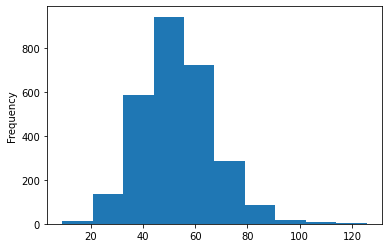

In [16]:
# Reasonable Normal distribution
df.Mortality_Rate.plot.hist()

#### Understanding Data Distribution: '*' vs Relevant values in Mortality Rate column

- **without_star** dataframe represents the data segment where mortality rate is not \*
- **no_y** dataframe represents the data segment where mortality rate is \*

In [17]:
print(f"* Mortality Rate Accounts for : { round(df_copy[df_copy.Mortality_Rate == '*'].__len__() / df_copy.__len__() * 100, 2) } % of total data")
print(f"Avg Mortality Rate is (after remove *) : { round(pd.to_numeric(df_copy.Mortality_Rate, errors='coerce').mean(), 2) } %% ")
without_star = df_copy[df_copy.Mortality_Rate != '*'].copy()
no_y = df_copy[df_copy.Mortality_Rate == '*'].copy()

* Mortality Rate Accounts for : 10.37 % of total data
Avg Mortality Rate is (after remove *) : 53.19 %% 


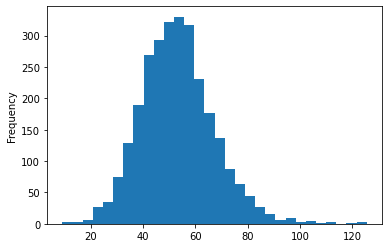

In [18]:
# mortaliy rate looks similar to a normal distribution
pd.to_numeric(df_copy.Mortality_Rate, errors='coerce').plot.hist(bins=30)

#### Testing Metrics: Poverty Rate, Median Income & Health Insurance Rate -- for Mortality Rate Column with * & without *

In [19]:
without_star['all_poverty_ratio'] = without_star['All_Poverty'] / without_star['POPESTIMATE2015'] * 100000
no_y['all_poverty_ratio'] = no_y['All_Poverty'] / no_y['POPESTIMATE2015'] * 100000

without_star['all_with_ratio'] = without_star['All_With'] / without_star['POPESTIMATE2015'] * 100000
no_y['all_with_ratio'] = no_y['All_With'] / no_y['POPESTIMATE2015'] * 100000

In [20]:
without_star.Mortality_Rate.astype('float').skew()
test = df_copy.copy()
test.loc[test.Mortality_Rate == '*','Mortality_Rate'] = 16
test.Mortality_Rate = test.Mortality_Rate.astype('float')
print(f'New Skew value after replace * with 16 : {test.Mortality_Rate.skew()}')

New Skew value after replace * with 16 : -0.07154685066611038


##### \* data shows a little bit lower poverty ratio

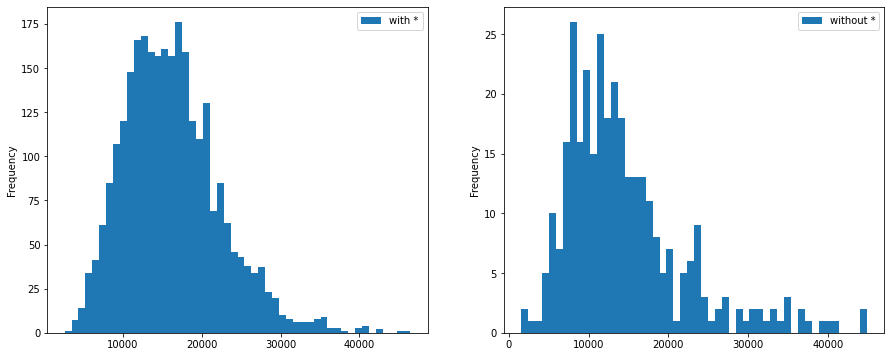

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
without_star.all_poverty_ratio.plot.hist(bins=50, ax = ax1, label='with *')
ax1.legend()
no_y.all_poverty_ratio.plot.hist(bins=50, ax=ax2, label='without *')
ax2.legend()

##### \* data shows no significant difference with overall median income

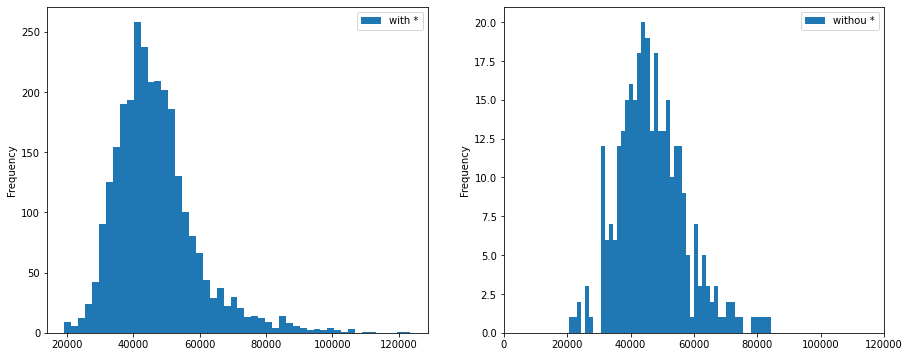

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
without_star.Med_Income.plot.hist(bins=50, ax= ax1,label='with *')
ax1.legend()
no_y.Med_Income.plot.hist(bins=50, ax= ax2, label= 'withou *')
plt.xlim(xmin=0, xmax = 120000)
ax2.legend()

##### \* data shows fewer people having health insurance (notice that it is not a normal distribution)

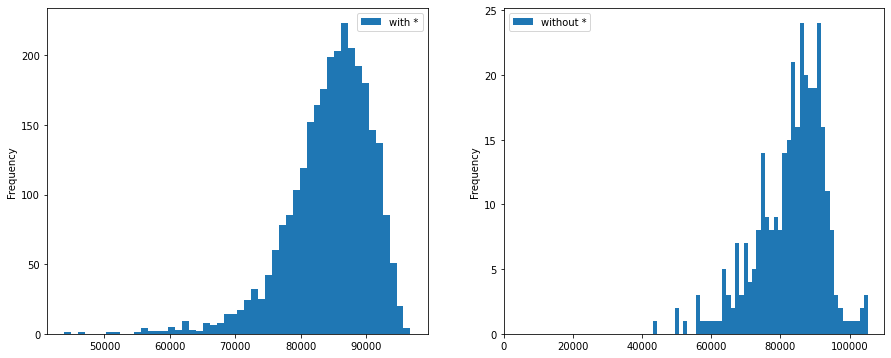

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
without_star.all_with_ratio.plot.hist(bins=50, ax = ax1,label='with *')
plt.xlim(xmin=0, xmax = 110000)
ax1.legend()
no_y.all_with_ratio.plot.hist(bins=50, ax = ax2, label='without *')
plt.xlim(xmin=0, xmax = 110000)
ax2.legend()


### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

After removing the data with * mortality rate
- Avg_Ann_Incidence: 163 non-numeirc data (\_ &\__). has outliers. impute with the median
- Incidence_Rate: 168 non-numeric data (163 \_ & \__ + 5 \*). After calculating the Avg_Ann_Incidence and POPESTIMATE2015  for the 5 \* values, we impute the missing values for the 163 data points with the median
- State : it's optional to convert into categorical type since the data size in not very large and we are not using it as a feature in our model, hence we are leaving it as is
- Recent_Trend: to categorical
- Avg_Ann_Deaths: to numerical


In [24]:
# calculate * in "Incidence_Rate"
df.loc[df['Incidence_Rate']=='*','Incidence_Rate'] = df.loc[df['Incidence_Rate']=='*','Avg_Ann_Incidence'] / df.loc[df['Incidence_Rate']=='*','POPESTIMATE2015'] * 100000
df['Incidence_Rate'] = df['Incidence_Rate'].astype('str').str.replace('#','')

In [25]:
for _ in ['Avg_Ann_Incidence', 'Incidence_Rate', 'Avg_Ann_Deaths']:
    df[_]  = pd.to_numeric(df[_], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2809 non-null   object 
 1   AreaName           2809 non-null   object 
 2   All_Poverty        2809 non-null   int64  
 3   M_Poverty          2809 non-null   int64  
 4   F_Poverty          2809 non-null   int64  
 5   FIPS               2809 non-null   object 
 6   Med_Income         2809 non-null   float64
 7   Med_Income_White   2809 non-null   float64
 8   M_With             2809 non-null   int64  
 9   M_Without          2809 non-null   int64  
 10  F_With             2809 non-null   int64  
 11  F_Without          2809 non-null   int64  
 12  All_With           2809 non-null   int64  
 13  All_Without        2809 non-null   int64  
 14  Incidence_Rate     2646 non-null   float64
 15  Avg_Ann_Incidence  2646 non-null   float64
 16  Recent_Trend       2809 

In [26]:
# Imputing the Incidence Rate and Avg Ann Incidence
df['Incidence_Rate'] = df['Incidence_Rate'].fillna(df['Incidence_Rate'].median())
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].fillna(df['Avg_Ann_Incidence'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2809 non-null   object 
 1   AreaName           2809 non-null   object 
 2   All_Poverty        2809 non-null   int64  
 3   M_Poverty          2809 non-null   int64  
 4   F_Poverty          2809 non-null   int64  
 5   FIPS               2809 non-null   object 
 6   Med_Income         2809 non-null   float64
 7   Med_Income_White   2809 non-null   float64
 8   M_With             2809 non-null   int64  
 9   M_Without          2809 non-null   int64  
 10  F_With             2809 non-null   int64  
 11  F_Without          2809 non-null   int64  
 12  All_With           2809 non-null   int64  
 13  All_Without        2809 non-null   int64  
 14  Incidence_Rate     2809 non-null   float64
 15  Avg_Ann_Incidence  2809 non-null   float64
 16  Recent_Trend       2809 

In [27]:
# As the unknown recent trend may also convey some information such as lack of recording, we decided to change all *, _, __ into NA as one of categories.
df['Recent_Trend'] = df['Recent_Trend'].replace({"*":"No_Records", "_":"No_Records", "__":"No_Records"}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   State              2809 non-null   object  
 1   AreaName           2809 non-null   object  
 2   All_Poverty        2809 non-null   int64   
 3   M_Poverty          2809 non-null   int64   
 4   F_Poverty          2809 non-null   int64   
 5   FIPS               2809 non-null   object  
 6   Med_Income         2809 non-null   float64 
 7   Med_Income_White   2809 non-null   float64 
 8   M_With             2809 non-null   int64   
 9   M_Without          2809 non-null   int64   
 10  F_With             2809 non-null   int64   
 11  F_Without          2809 non-null   int64   
 12  All_With           2809 non-null   int64   
 13  All_Without        2809 non-null   int64   
 14  Incidence_Rate     2809 non-null   float64 
 15  Avg_Ann_Incidence  2809 non-null   float64 
 16  Recent

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [28]:
for _ in ['All_Poverty', 'M_Poverty', 'F_Poverty','M_With', 'M_Without', 'F_With',
       'F_Without', 'All_With', 'All_Without']:
       col = _ + '_per100K'
       df[col] = df[_] / df['POPESTIMATE2015'] * 100000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   State                2809 non-null   object  
 1   AreaName             2809 non-null   object  
 2   All_Poverty          2809 non-null   int64   
 3   M_Poverty            2809 non-null   int64   
 4   F_Poverty            2809 non-null   int64   
 5   FIPS                 2809 non-null   object  
 6   Med_Income           2809 non-null   float64 
 7   Med_Income_White     2809 non-null   float64 
 8   M_With               2809 non-null   int64   
 9   M_Without            2809 non-null   int64   
 10  F_With               2809 non-null   int64   
 11  F_Without            2809 non-null   int64   
 12  All_With             2809 non-null   int64   
 13  All_Without          2809 non-null   int64   
 14  Incidence_Rate       2809 non-null   float64 
 15  Avg_Ann_Incidence    

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


Text(0.5, 1.0, 'Correlation Heatmap')

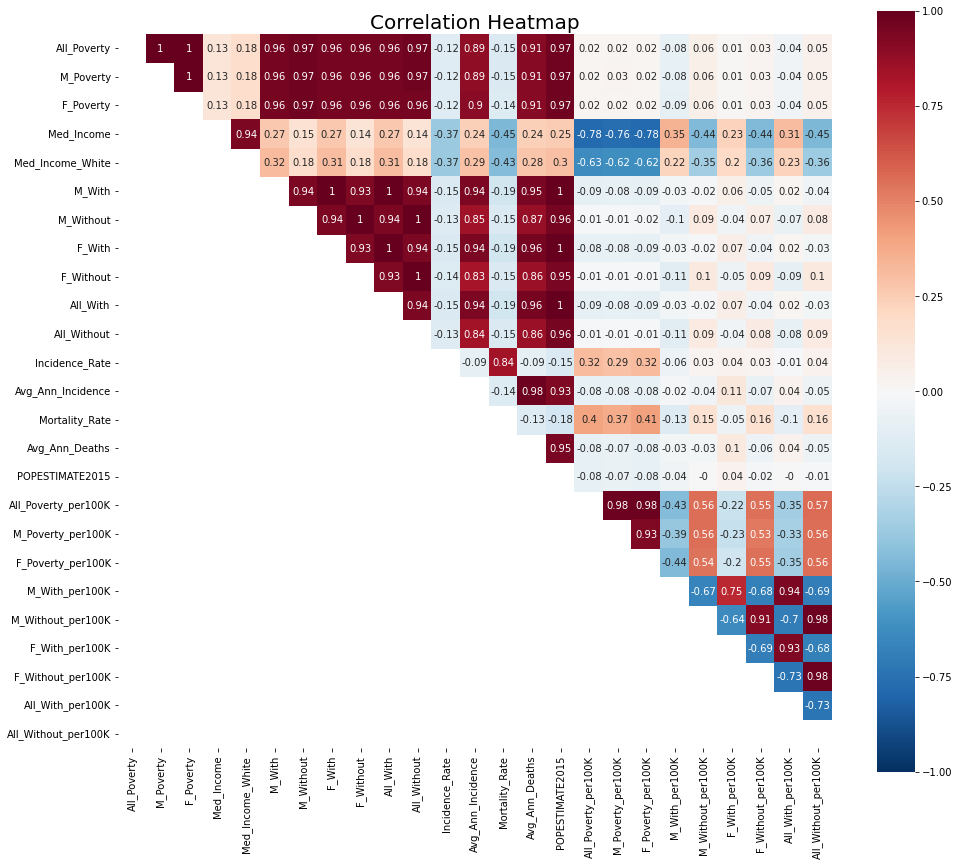

In [29]:
# heatmap with all the columns
plt.figure(figsize = (16,14))
matrix = np.triu(df.corr())
sns.heatmap(df.corr().round(2), square =True, annot=True, cmap='RdBu_r', mask=np.flip(matrix), vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize =20)

Text(0.5, 1.0, 'Correlation Heatmap')

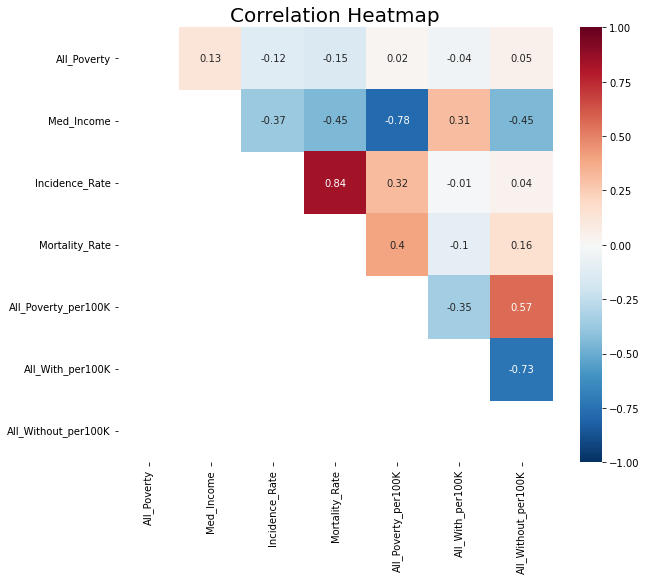

In [30]:
# After removing columns with correlation >= 0.85
plt.figure(figsize = (10,8))
test = df.drop(columns=['M_Poverty', 'F_Poverty','M_With', 'M_Without', 'F_With', 'F_Without', 
                        'All_With', 'All_Without', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 
                        'POPESTIMATE2015','Med_Income_White','M_Poverty_per100K', 'F_Poverty_per100K',
                        'M_With_per100K', 'F_With_per100K','M_Without_per100K', 'F_Without_per100K'])
matrix = np.triu(test.corr())
sns.heatmap(test.corr().round(2), square =True, annot=True, cmap='RdBu_r', mask=np.flip(matrix), vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize =20)

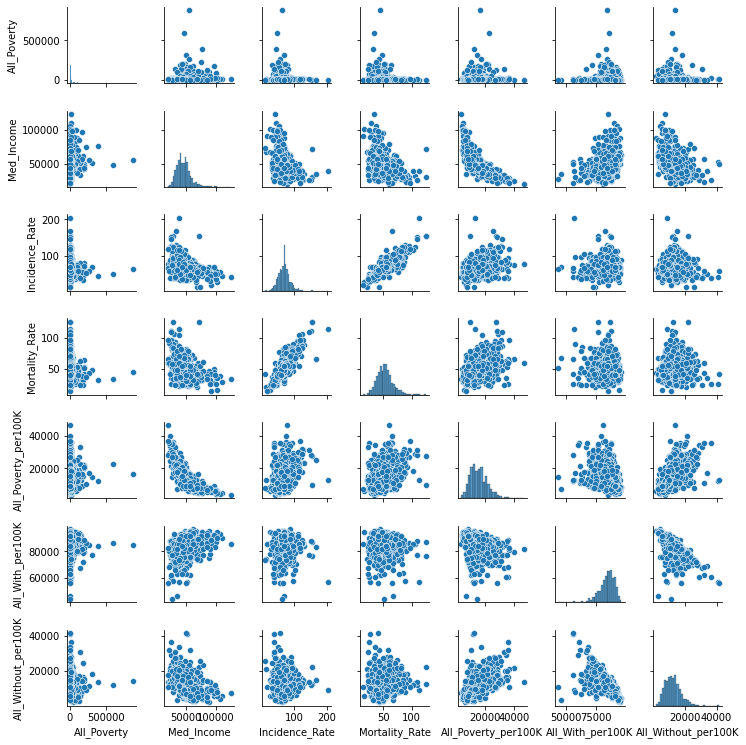

In [31]:
# Based on the heatmap above, we can be assured that the following features (dropped) are highly correlated and thus can be removed. Now, we can look beyond just the values of correlation.
sns.pairplot(df.drop(columns=['M_Poverty', 'F_Poverty','M_With', 'M_Without', 'F_With', 'F_Without', 
                              'All_With', 'All_Without', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 
                        'POPESTIMATE2015','Med_Income_White','M_Poverty_per100K', 'F_Poverty_per100K',
                        'M_With_per100K', 'F_With_per100K','M_Without_per100K', 'F_Without_per100K']).sample(1000), height=1.5)

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

Finally, we are going ahead with 6 numerical features ('All_Poverty', 'Med_Income', 'Incidence_Rate', 'All_Poverty_per100K', 'All_With_per100K', 'All_Without_per100K') and 1 categorical feature ('Recent_Trend')

We removed columns which had high correlation (above 0.85) with the  6 numerical features above, as those highly correlated variables would have been redundant.


---

Selected features
- All_Poverty:  removed highly correlated features such as 'M_Poverty', 'F_Poverty', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 'POPESTIMATE2015'. <br> Also, Poverty is a good indicator for predicting mortality rate since it also indicates degree of access to healthcare 
- Med_Income: removed highly correlated features such as 'Med_Income_White'. <br> Income is another variable that could indicate access to better treatments, proper diagnosis, among other factors
- Incidence_Rate: Incidence rate has a positive linear relationship with the mortality rate, hence it is an important feature
- All_Poverty_per100K: removed highly correlated features such as 'M_Poverty_per100K', 'F_Poverty_per100K'
- All_With_per100K: removed highly correlated features such as 'M_With_per100K', 'F_With_per100K'
- All_Without_per100K: removed highly correlated features such as 'M_Without_per100K', 'F_Without_per100K'


In [32]:
# Remove features with high correlation and keep only 6 numerical features + 1 categorical feature
selected_features_numeric = ['All_Poverty', 'Med_Income', 'Incidence_Rate', 'All_Poverty_per100K', 'All_With_per100K', 'All_Without_per100K']
selected_features_category = ['Recent_Trend']

Text(0.5, 1.0, 'Correlation Heatmap with Cateogorical Data')

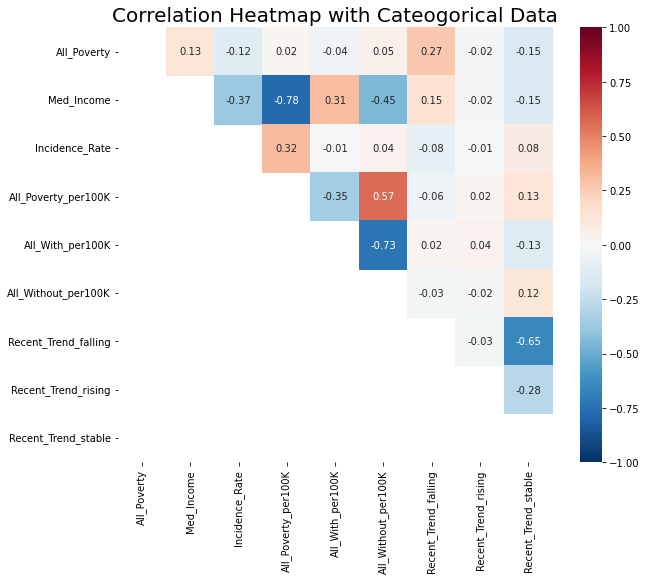

In [33]:
# Because we will use Recent_Trend, doing the one-hot encoding and check its correlation
plt.figure(figsize = (10,8))
test = df[selected_features_numeric + selected_features_category].copy()
test = pd.get_dummies(test, drop_first=True)
matrix = np.triu(test.corr())
sns.heatmap(test.corr().round(2), square =True, annot=True, cmap='RdBu_r', mask=np.flip(matrix), vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Cateogorical Data", fontsize =20)

## **Part 3: Regression Model Construction [30 Marks]**


### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

We have a relatively small data size (2809 rows), hence we are keeping test data at 10% and splitting the rest into training and validation splits, so that around 80% of the data can be used for training.

In [34]:
# model 1 
from sklearn.model_selection import train_test_split
seed = 487
X, y = df[selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

For Model 1, we are using the features without transformation. Also, we are performing one-hot encoding on the  categorical variable Recent_Trend to use it in our model.

For Model 2, we remove All_With_per100K as backward selection and do one-hot encoding as well.

For Model 3, we use the feature with log transformation on All_Poverty and do one-hot encoding as well.

In all models, we compare among multivariate linear regression and ones with regularization. The results show that there is no need to do regularization for this data set.

|         	| Selected Features                                                                                                 	| Transformation                                                   	| Training set R2 	| Validation set R2 	| Decision    	|
|---------	|-------------------------------------------------------------------------------------------------------------------	|------------------------------------------------------------------	|-----------------	|-------------------	|-------------	|
| Model 1 	| All_Poverty, Med_Income, Incidence_Rate, All_Poverty_per100K, All_With_per100K, All_Without_per100K, Recent_Trend 	| One-Hot Encoding (Recent_Trend)                                  	| 0.742491        	| 0.799889          	|      X      	|
| Model 2 	| All_Poverty, Med_Income, Incidence_Rate, All_Poverty_per100K, All_Without_per100K, Recent_Trend                   	| One-Hot Encoding (Recent_Trend)                                  	| 0.742365        	| 0.799298          	|      X      	|
| Model 3 	| All_Poverty, Med_Income, Incidence_Rate, All_Poverty_per100K, All_With_per100K, All_Without_per100K, Recent_Trend 	| Log Transformation (All_Poverty) One-Hot Encoding (Recent_Trend) 	| 0.744373        	| 0.803989          	| Final Model 	|



In [35]:
# Linear model 1
# 6 numerical features + 1 categorical feature

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lcv = LassoCV(alphas = 10 ** np.arange(-5,1,0.2))
rcv = RidgeCV(alphas = np.arange(10,20,0.5))
lr = LinearRegression()

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    # StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)
preprocessor = make_column_transformer(
    (numeric_transformer, selected_features_numeric),
    (categorical_transformer, selected_features_category)
)

models = [lcv, rcv, lr]
scores = []
training_scores = []
mse_val_scores = []
mae_val_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    scores.append(model.score(X_val, y_val))
    training_scores.append(model.score(X_train, y_train))
    mse_val_scores.append(mean_squared_error(y_val, model.predict(X_val)))
    mae_val_scores.append(mean_absolute_error(y_val, model.predict(X_val)))

model1_performance = pd.DataFrame({
    'model':models, 
    'validation mse score':mse_val_scores, 
    'validation mae score':mae_val_scores,
    'validation R2 score':scores, 
    'training R2 scores': training_scores})
model1_performance

,model,validation mse score,validation mae score,validation R2 score,training R2 scores
0,"LassoCV(alphas=array([1.00000000e-05, 1.584893...",38.758851,4.739891,0.798962,0.742436
1,"RidgeCV(alphas=array([10. , 10.5, 11. , 11.5, ...",38.785942,4.738110,0.798821,0.742439
2,LinearRegression(),38.579961,4.732820,0.799889,0.742491


In [36]:
# Model 2
# Remove features with high correlation and keep only 5 numerical features + 1 categorical feature. Also remove 'All_With_per100K' 
selected_features_numeric = ['All_Poverty', 'Med_Income', 'Incidence_Rate', 'All_Poverty_per100K',  'All_Without_per100K']

X, y = df[selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set

lcv = LassoCV(alphas = 10 ** np.arange(-5,1,0.2))
rcv = RidgeCV(alphas = np.arange(10,20,0.5))
lr = LinearRegression() 


numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    # StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)
preprocessor = make_column_transformer(
    (numeric_transformer, selected_features_numeric),
    (categorical_transformer, selected_features_category)
)

models = [lcv, rcv, lr]
scores = []
training_scores = []
mse_val_scores = []
mae_val_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    scores.append(model.score(X_val, y_val))
    training_scores.append(model.score(X_train, y_train))
    mse_val_scores.append(mean_squared_error(y_val, model.predict(X_val)))
    mae_val_scores.append(mean_absolute_error(y_val, model.predict(X_val)))

model2_performance = pd.DataFrame({
    'model':models, 
    'validation mse score':mse_val_scores, 
    'validation mae score':mae_val_scores,
    'validation R2 score':scores, 
    'training R2 scores': training_scores})
model2_performance

,model,validation mse score,validation mae score,validation R2 score,training R2 scores
0,"LassoCV(alphas=array([1.00000000e-05, 1.584893...",38.869648,4.747173,0.798387,0.742311
1,"RidgeCV(alphas=array([10. , 10.5, 11. , 11.5, ...",38.894338,4.745443,0.798259,0.742314
2,LinearRegression(),38.694002,4.740489,0.799298,0.742365


Now, for the final model, we will apply log transformation on All_Poverty feature to see if the model accuracy improves. Before that, it is always good to see the histogram before and after transformation.

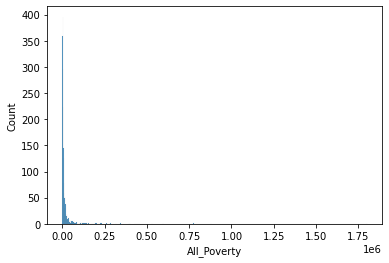

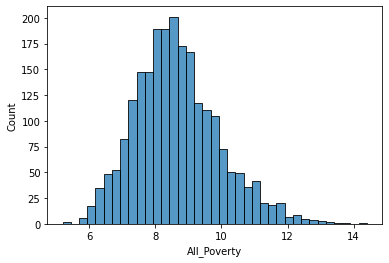

In [37]:
sns.histplot(X_train['All_Poverty'])
plt.show()
sns.histplot(np.log(X_train['All_Poverty']))

In [38]:
# Model 3
# Remove features with high correlation and keep only 7 numerical features + 1 categorical feature
from sklearn.feature_selection import SequentialFeatureSelector

log_needed_numeric = ['All_Poverty']
normal_selected_features_numeric = ['Med_Income', 'Incidence_Rate', 'All_Poverty_per100K', 'All_With_per100K', 'All_Without_per100K']

X, y = df[log_needed_numeric + normal_selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set

lcv = LassoCV(alphas = 10 ** np.arange(-5,1,0.2))
rcv = RidgeCV(alphas = np.arange(10,20,0.5))
lr = LinearRegression() 


numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    # StandardScaler()
)

log_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=True),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)
preprocessor = make_column_transformer(
    (log_transformer, log_needed_numeric),
    (numeric_transformer, normal_selected_features_numeric),
    (categorical_transformer, selected_features_category)
)


models = [lcv, rcv, lr]
scores = []
training_scores = []
mse_val_scores = []
mae_val_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    scores.append(model.score(X_val, y_val))
    training_scores.append(model.score(X_train, y_train))
    mse_val_scores.append(mean_squared_error(y_val, model.predict(X_val)))
    mae_val_scores.append(mean_absolute_error(y_val, model.predict(X_val)))

final_model_performance = pd.DataFrame({
    'model':models, 
    'validation mse score':mse_val_scores, 
    'validation mae score':mae_val_scores,
    'validation R2 score':scores, 
    'training R2 scores': training_scores})
final_model_performance


,model,validation mse score,validation mae score,validation R2 score,training R2 scores
0,"LassoCV(alphas=array([1.00000000e-05, 1.584893...",37.858330,4.710191,0.803633,0.744364
1,"RidgeCV(alphas=array([10. , 10.5, 11. , 11.5, ...",38.026735,4.713774,0.802759,0.744302
2,LinearRegression(),37.789585,4.706982,0.803989,0.744373


### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

Based on the table shown below, the model 3 (final model) has the lowest value MSE and MAE and highest value of R-squared. So, we choose the model 3 as our final model.

In [39]:
pd.DataFrame(
    [model1_performance.iloc[2,1:4],
     model2_performance.iloc[2,1:4],
     final_model_performance.iloc[2,1:4]], 
     index = ['model1', 'model2', 'final model']
)

,validation mse score,validation mae score,validation R2 score
model1,38.579961,4.732820,0.799889
model2,38.694002,4.740489,0.799298
final model,37.789585,4.706982,0.803989


## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

There is no multicollinearity in our feature set since all the VIF values are in the range 1-4, which is acceptably low. Hence, there is no need to refit the model. 

VIF values greater than 10 indicate that a predictor variable is to a large extent dependent on other predictor variables, and this can lead to unstable and misleading regression coefficients and inflated R-squared values

In order to get a better sense of R squared value in presence of multicollinearity, we can use adjusted R squared metric that penalize presence of multicollinearity in the model. Since our VIF values are in acceptable range, we are not performing this step as our high R squared is not due to presence of multicollinearity but indeed represents true explained variance

In [40]:
from patsy import dmatrices
df_part4 = df[X_train.columns.tolist() + ['Mortality_Rate']].copy()

formula = "Mortality_Rate ~ np.log(All_Poverty)+Med_Income+Incidence_Rate+All_Poverty_per100K+All_With_per100K+All_Without_per100K+Recent_Trend"

# get y and X dataframes based on this regression:
y_4, X_4 = dmatrices(formula, df_part4, return_type='dataframe')

vif = pd.DataFrame()
vif["features"] = X_4.columns
vif["VIF Factor"] = [variance_inflation_factor(X_4.values, i) for i in range(len(X_4.columns))]

In [41]:
vif

,features,VIF Factor
0,Intercept,638.693327
1,Recent_Trend[T.falling],2.091004
2,Recent_Trend[T.rising],1.194737
3,Recent_Trend[T.stable],2.163859
4,np.log(All_Poverty),1.382129
5,Med_Income,3.413876
6,Incidence_Rate,1.211065
7,All_Poverty_per100K,3.817169
8,All_With_per100K,2.233388
9,All_Without_per100K,2.945189


## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

Using the final model (log transformation on All_Poverty), we get 62.98 on MSE measure.

In [42]:
from sklearn.metrics import mean_squared_error
X, y = df[log_needed_numeric + normal_selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set

final_model = make_pipeline(preprocessor, lr)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
final_model_performance = pd.DataFrame({
    'criteria':['MSE', 'R2','MAE'], 
    'score':[
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred),
        mean_absolute_error(y_test, y_pred)
    ]})
final_model_performance


,criteria,score
0,MSE,62.980038
1,R2,0.693968
2,MAE,5.445357


## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

---

Ensemble learning models such as Random Forest and XGBoost models can perform better since they are able to model complex non-linear relationships that regression models cannot.

Also, XGBoost can work with missing values in the data without the need for manual imputation. Since currently we have removed all the rows from the data where Mortality Rate is missing, using XG Boost can prove to be very useful here.

In [43]:
# Potential improvement direction: feature enginerring e.g. gender ratio 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

log_needed_numeric = ['All_Poverty','M_Poverty', 'F_Poverty']
normal_selected_features_numeric = df._get_numeric_data().drop(columns=log_needed_numeric + ['Mortality_Rate']).columns.tolist()

X, y = df[log_needed_numeric + normal_selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set

rf = RandomForestRegressor(max_depth=6, min_samples_leaf=8, oob_score=True, n_estimators=300)
xgbr = xgb.XGBRegressor(n_estimators=300)

numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        # StandardScaler()
    )
log_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=True),
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)
preprocessor = make_column_transformer(
    (log_transformer, log_needed_numeric),
    (numeric_transformer, normal_selected_features_numeric),
    (categorical_transformer, selected_features_category)
)

models = [rf, xgbr]
mse_scores = []
val_scores = []
training_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    mse_scores.append(mean_squared_error(model.predict(X_val), y_val))
    val_scores.append(model.score(X_val, y_val))
    training_scores.append(model.score(X_train, y_train))
pd.DataFrame({'model':models, 'mse_val_score':mse_scores, 'r2_val_score':val_scores, 'training scores': training_scores}).round(2)

[05:42:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,mse_val_score,r2_val_score,training scores
0,"(DecisionTreeRegressor(max_depth=6, max_featur...",40.73,0.79,0.82
1,XGBRegressor(n_estimators=300),20.57,0.89,0.96


Compared to the MSE value (37.789585) in the validation data set, XGB regression did a good job and achieved only 20.57 of MSE. One of the benefits of using non-linear regression is that we do not need to be worried too much about multicollinearity but curse of dimension.

## Compare with original model

We notice that XG Boost is able to achieve a significantly lower MSE compared to our Final Model (21.9 vs 62.98) in the testing data set and is able to explain 89% of the variance in the data. 

Test Set Performance - Final Model vs XGB Regression

|                                 	| MSE       	| R2       	| MAE      	|   	|   	|
|---------------------------------	|-----------	|----------	|----------	|---	|---	|
| Final Model (Linear Regression) 	| 62.980038 	| 0.693968 	| 5.445357 	|   	|   	|
| XGB Regressor                   	| 21.954019 	| 0.893321 	| 3.542454 	|   	|   	|

In [44]:
print(""" Original model performance:""")
final_model_performance

 Original model performance:


,criteria,score
0,MSE,62.980038
1,R2,0.693968
2,MAE,5.445357


In [45]:
print(""" Alternative model performance:""")
model = make_pipeline(preprocessor, xgbr)
model.fit(X_train, y_train)

alternative_model_performance = pd.DataFrame({
    'criteria':['MSE', 'R2','MAE'], 
    'score':[
        mean_squared_error(y_test, model.predict(X_test)),
        r2_score(y_test, model.predict(X_test)),
        mean_absolute_error(y_test, model.predict(X_test))
    ]})
alternative_model_performance

 Alternative model performance:
[05:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,criteria,score
0,MSE,21.954019
1,R2,0.893321
2,MAE,3.542454


# Appendix -

## Other models

In [46]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
import graphviz
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

log_needed_numeric = ['All_Poverty','M_Poverty', 'F_Poverty']
normal_selected_features_numeric = df._get_numeric_data().drop(columns=log_needed_numeric + ['Mortality_Rate']).columns.tolist()

X, y = df[log_needed_numeric + normal_selected_features_numeric + selected_features_category], df['Mortality_Rate']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.1, random_state= seed)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.11, random_state= seed)
# 10% test set, 9.9% validation set (roughly 10%), 80.1% traning set


lcv = LassoCV(alphas = 10 ** np.arange(-5,1,0.2))
rcv = RidgeCV(alphas = np.arange(10,20,0.5))
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)
rf = RandomForestRegressor(max_depth=6, min_samples_leaf=8, oob_score=True, n_estimators=300)
baggingR = BaggingRegressor()
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=180)
xgbr = xgb.XGBRegressor(n_estimators=300)

numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        # StandardScaler()
    )
log_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=True),
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)
preprocessor = make_column_transformer(
    (log_transformer, log_needed_numeric),
    (numeric_transformer, normal_selected_features_numeric),
    (categorical_transformer, selected_features_category)
)

models = [lcv, rcv, lr, dt, rf, baggingR, gbr, xgbr]
mse_scores = []
val_scores = []
training_scores = []
for model in models:
    model = make_pipeline(preprocessor, model)
    model.fit(X_train, y_train)
    mse_scores.append(mean_squared_error(model.predict(X_val), y_val))
    val_scores.append(model.score(X_val, y_val))
    training_scores.append(model.score(X_train, y_train))
pd.DataFrame({'model':models, 'mse_val_score':mse_scores, 'r2_val_score':val_scores, 'training scores': training_scores}).round(2)

[05:42:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,mse_val_score,r2_val_score,training scores
0,"LassoCV(alphas=array([1.00000000e-05, 1.584893...",41.77,0.78,0.74
1,"RidgeCV(alphas=array([10. , 10.5, 11. , 11.5, ...",36.67,0.81,0.75
2,LinearRegression(),36.50,0.81,0.75
3,"DecisionTreeRegressor(max_depth=4, min_samples...",50.68,0.74,0.75
4,"(DecisionTreeRegressor(max_depth=6, max_featur...",40.69,0.79,0.82
5,(DecisionTreeRegressor(random_state=390582188)...,44.99,0.77,0.95
6,([DecisionTreeRegressor(criterion='friedman_ms...,18.94,0.90,0.99
7,XGBRegressor(n_estimators=300),20.57,0.89,0.96


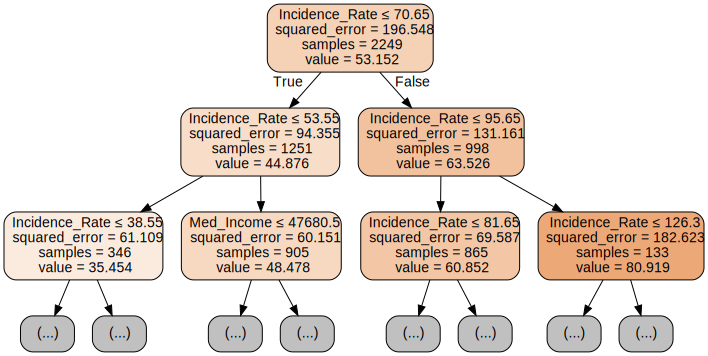

In [47]:
# Sample nodes of Decision Tree
ohe_cols = preprocessor.named_transformers_["pipeline-3"]\
    .named_steps["onehotencoder"]\
        .get_feature_names_out(selected_features_category).tolist()
X_train_transformed = pd.DataFrame(
    preprocessor.fit_transform(X_train), 
    columns=log_needed_numeric + normal_selected_features_numeric + ohe_cols)

dot_data = export_graphviz(
    dt, 
    out_file=None, 
    feature_names=X_train_transformed.columns.values.tolist(), 
    filled=True, 
    rounded=True, 
    special_characters=True,
    max_depth=2,)
graph = graphviz.Source(dot_data)
graph

Although the score calculated by the gradient boosting regression is a sweet temptation, we are hesitate to use it because of over-fitting. Instead, we used XGB regression. 

## Cleaning the Output Resonse [Mortality Rate] Option 3 -- Testing semi-supervised

In [48]:
def test_semi_supervised():
    test = df_copy.copy()
    test['Avg_Ann_Incidence'] = test['Avg_Ann_Incidence'].map(lambda x: 3 if x == '3 or fewer' else x)
    test['Avg_Ann_Incidence'] = pd.to_numeric(test['Avg_Ann_Incidence'], errors='coerce')
    test['Avg_Ann_Incidence'] = test['Avg_Ann_Incidence'].fillna(test['Avg_Ann_Incidence'].mean())
    test['Incidence_Rate'] = pd.to_numeric(test['Incidence_Rate'], errors='coerce')
    test['Incidence_Rate'] = test['Incidence_Rate'].fillna(test['Incidence_Rate'].mean())
    for _ in ['Med_Income', 'Med_Income_White']:
        test[_] = test[_].fillna(test[_].mean())
    test['Mortality_Rate'] = pd.to_numeric(test['Mortality_Rate'], errors='coerce')
    
    from sklearn.linear_model import RidgeCV, LassoCV
    from sklearn.model_selection import train_test_split
    selected_features = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White','M_With','M_Without','F_With','F_Without','All_With', 'Avg_Ann_Incidence','Mortality_Rate']
    train, test_set = test.loc[test['Mortality_Rate'].notna()], test[test['Mortality_Rate'].isna()]
    train, test_set = train[selected_features], test_set[selected_features].drop('Mortality_Rate', axis=1)
    train_X = train.drop('Mortality_Rate', axis=1)
    train_y = train['Mortality_Rate']
    X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size = 0.2)

    selected_features = ['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White','M_With','M_Without','F_With','F_Without','All_With', 'Avg_Ann_Incidence','Mortality_Rate']
    import warnings
    warnings.filterwarnings('ignore')
    # low R2 value
    rdg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1,1],cv = 5) 
    rdg.fit(X_train, y_train)
    print(rdg.score(X_val, y_val)) # 0.21861666944378444

    las = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv = 10)
    las.fit(X_train, y_train)
    print(las.score(X_val, y_val)) # 0.21694593681179264
    warnings.filterwarnings('default')

## Cleaning the Output Resonse [Mortality Rate] Option 4 -- Manually add value

In [49]:
df.head(1)

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,All_Poverty_per100K,M_Poverty_per100K,F_Poverty_per100K,M_With_per100K,M_Without_per100K,F_With_per100K,F_Without_per100K,All_With_per100K,All_Without_per100K
0,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,120747,23245,122426,21393,243173,44638,61.5,131.0,stable,47.3,96,298695,8006.16013,3581.579872,4424.580257,40424.848089,7782.185842,40986.959942,7162.155376,81411.808032,14944.341218


In [50]:
def option_4():
    ''' Just saved here in case of executing it accidently 
    '''
        # Removing rows where Mortality Rate and Incidence_Rate both are not available (46 rows out of 3134)
    df = df[~( (df['Mortality_Rate']=='*') & (df['Incidence_Rate'].isin(['_', '__'])) )].reset_index(drop=True) #46
    # The mortality rate given a person having lung cancer
    mor_rate_given_lung = pd.to_numeric(df.loc[df['Mortality_Rate']!='*','Avg_Ann_Deaths'], errors='coerce').sum() / pd.to_numeric(df.loc[df['Mortality_Rate']!='*','Avg_Ann_Incidence'], errors='coerce').sum()
    # step 1-3
    df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].apply(lambda x: 2 if x == '3 or fewer' else x) # convert '<=3' into 3
    df.loc[df['Avg_Ann_Incidence'].isin(['_','__']),'Avg_Ann_Incidence'] = (pd.to_numeric(df.loc[df['Avg_Ann_Incidence'].isin(['_','__']),'Avg_Ann_Deaths']) / mor_rate_given_lung).round(0) # change _, __ into projected number
    df.loc[df['Mortality_Rate']=='*','Avg_Ann_Deaths'] = (pd.to_numeric(df.loc[df['Mortality_Rate']=='*','Avg_Ann_Incidence']) * mor_rate_given_lung).round(0) # calculate unknown Avg_Ann_Deaths by Avg_Ann_Incidence* P(overall lung cancer mortality rate)
    df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].astype('str').str.replace(',','')

    for _ in ['Avg_Ann_Deaths','Avg_Ann_Incidence']:
        df[_] = pd.to_numeric(df[_])

    # calculate mortality rate
    df.loc[df['Mortality_Rate']=='*','Mortality_Rate'] = df.loc[df['Mortality_Rate']=='*','Avg_Ann_Deaths'] / df.loc[df['Mortality_Rate']=='*','POPESTIMATE2015'] * 100000
    df['Mortality_Rate'] = pd.to_numeric(df['Mortality_Rate'])

    # remove outliers
    outliers_num = df.loc[df['Incidence_Rate']=='*','Mortality_Rate'].mean()
    #  + df.loc[df['Incidence_Rate']=='*','Mortality_Rate'].std() 
    df = df.drop(df.loc[(df['Incidence_Rate']=='*') & (df['Mortality_Rate']>outliers_num) ,'Mortality_Rate'].index).reset_index(drop=True)